In [2]:
import numpy as np
import matplotlib.pyplot as plt
from util import draw_thumbnail

from sklearn import datasets

Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 263 ('font.family:  Malgun Gothic')
Duplicate key in file WindowsPath('c:/Users/gik_k/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 414 ('axes.unicode_minus: False')


In [3]:
faces = datasets.fetch_olivetti_faces()

In [4]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position
    (with tolerance for some side movement).

**Data Set Characteristics:**

=================   =====================
Classes              

In [5]:
faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [6]:
print(faces.images.shape)

(400, 64, 64)


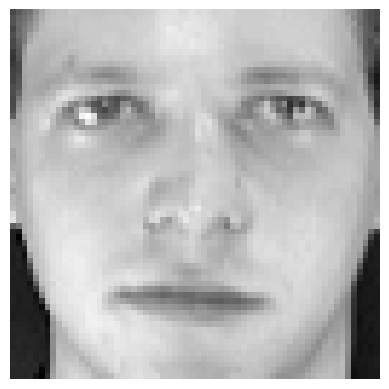

In [7]:
plt.imshow(faces.images[0], cmap='gray')
plt.axis('off')

plt.show()

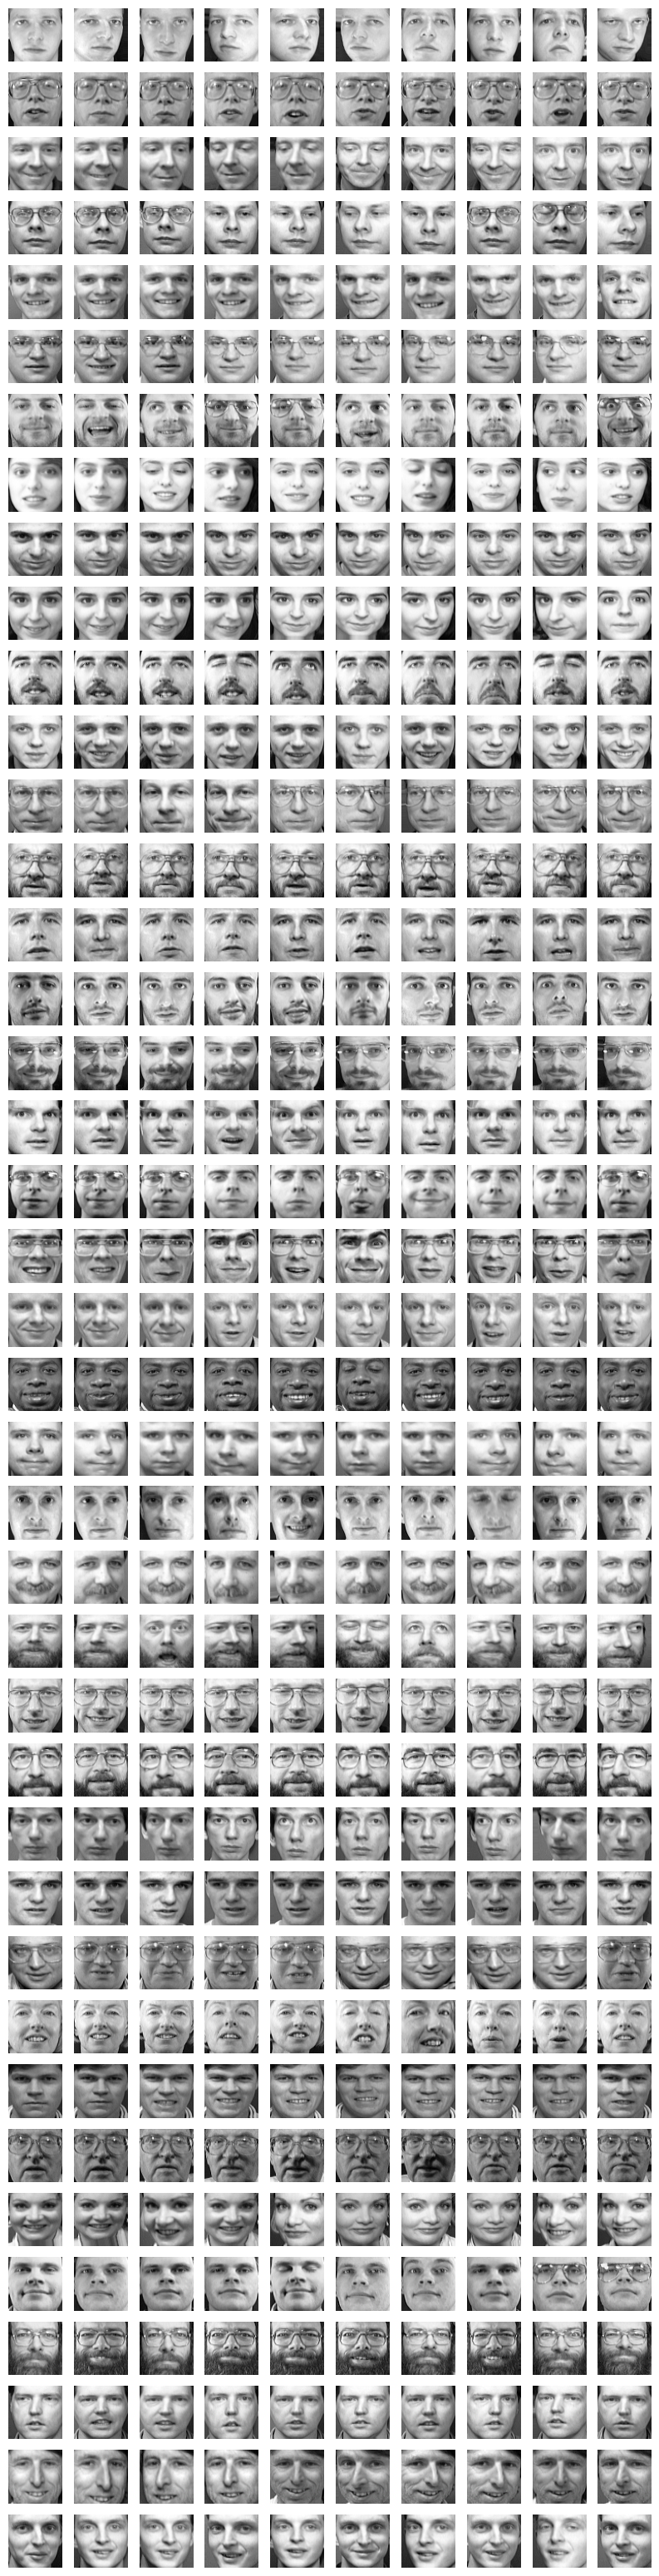

In [8]:
draw_thumbnail(faces.images, cmap='gray')

In [9]:
target = faces.target
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

label: 0


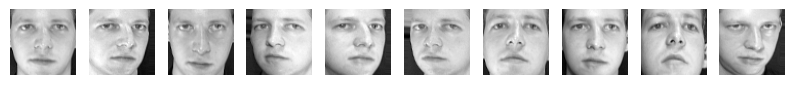

label: 1


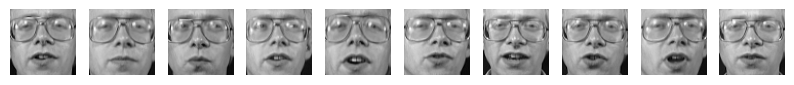

label: 2


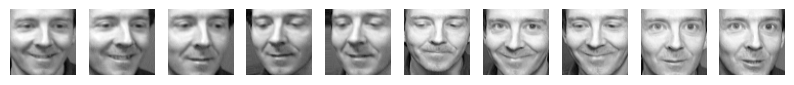

label: 3


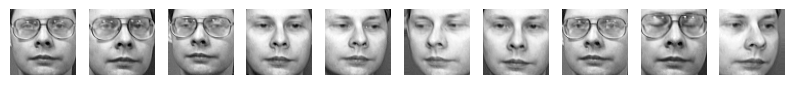

label: 4


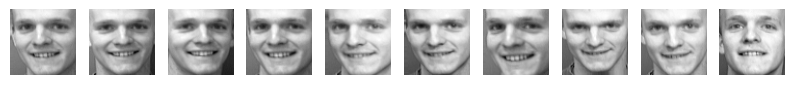

label: 5


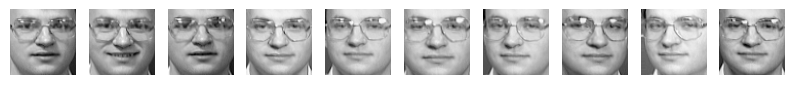

label: 6


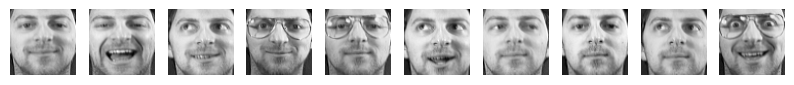

label: 7


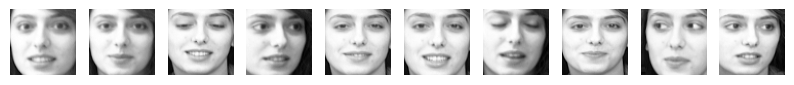

label: 8


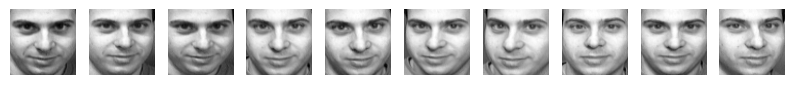

label: 9


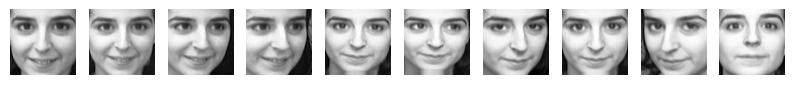

label: 10


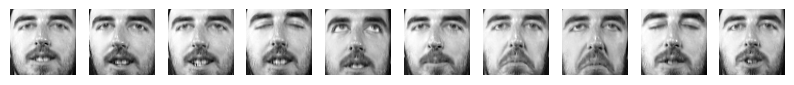

label: 11


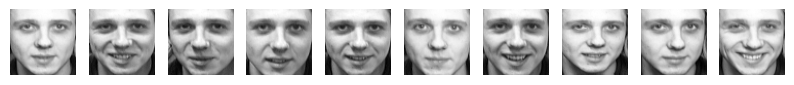

label: 12


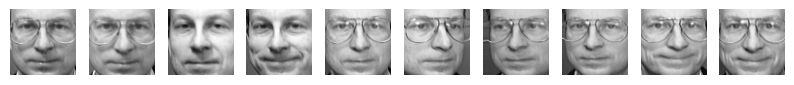

label: 13


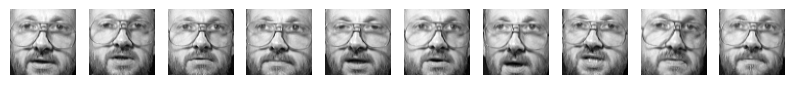

label: 14


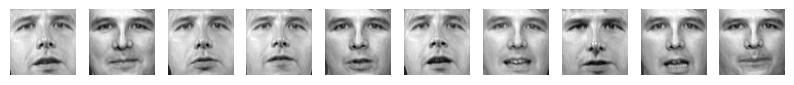

label: 15


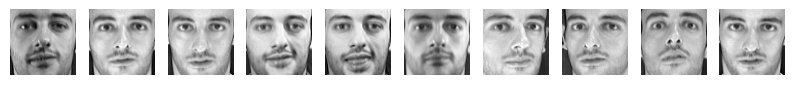

label: 16


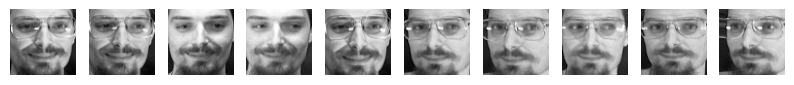

label: 17


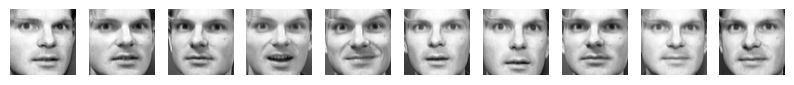

label: 18


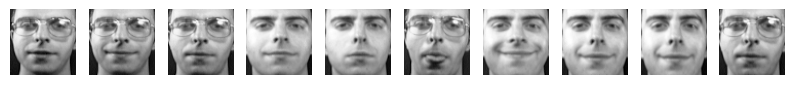

label: 19


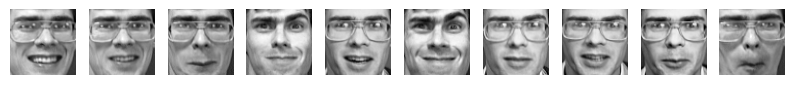

label: 20


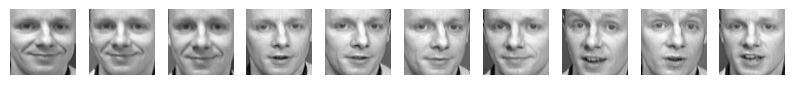

label: 21


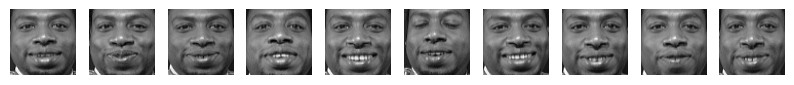

label: 22


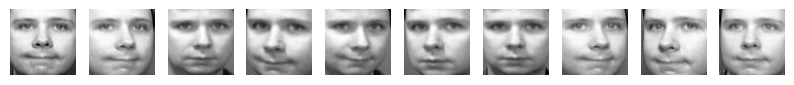

label: 23


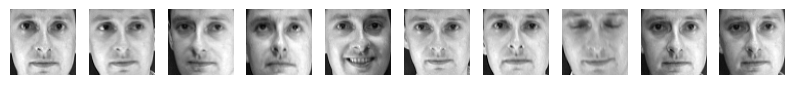

label: 24


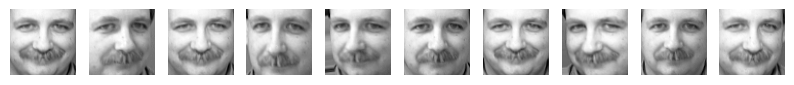

label: 25


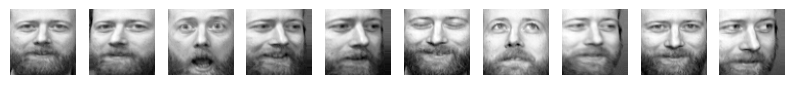

label: 26


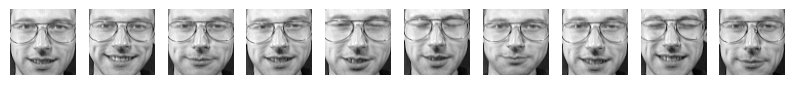

label: 27


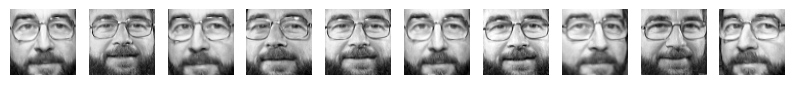

label: 28


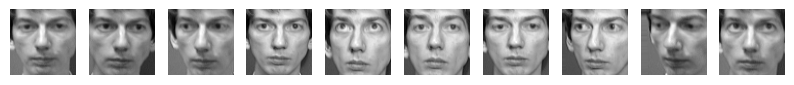

label: 29


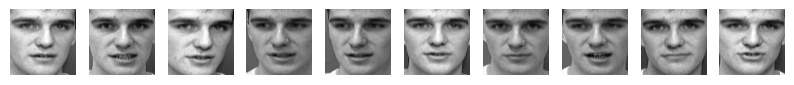

label: 30


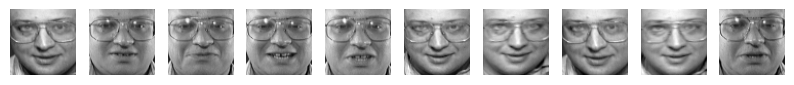

label: 31


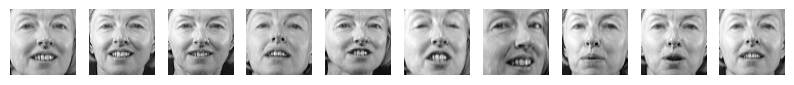

label: 32


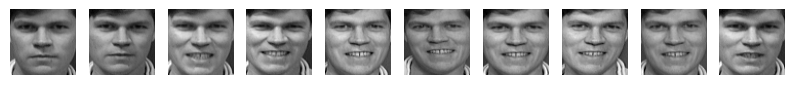

label: 33


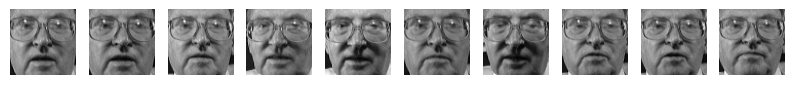

label: 34


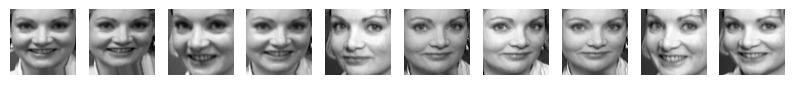

label: 35


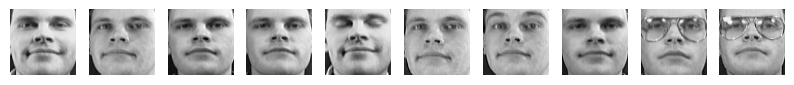

label: 36


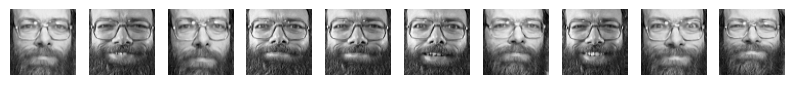

label: 37


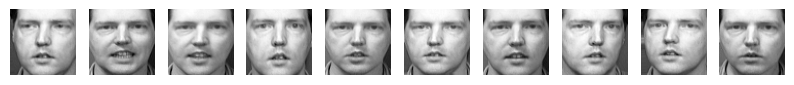

label: 38


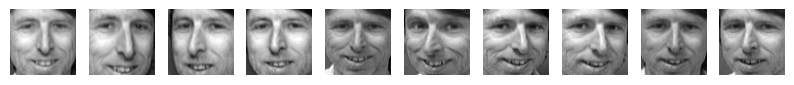

label: 39


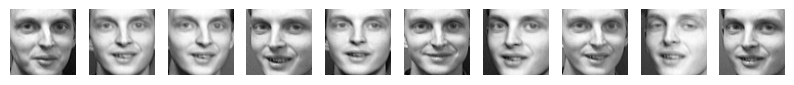

In [10]:
people_labels = list()

for i in np.unique(target):
    people_labels.append(i)
    print('label: {0}'.format(i))
    draw_thumbnail(faces.images[target == i])

In [25]:
# 차원 전환 후 픽셀 평균
one_dimensions = list()
one_dimension_means = list()

for i in people_labels:
    one_dimensions.append(faces.images[target == i].reshape(-1, 64 * 64))

a = one_dimensions[0].mean(axis=0)
a.shape

idx = 0
for _ in range(len(one_dimensions)):
    one_dimension_means.append(one_dimensions[idx].mean(axis=0))
    idx += 1

In [26]:
one_dimension_means[0].shape

(4096,)

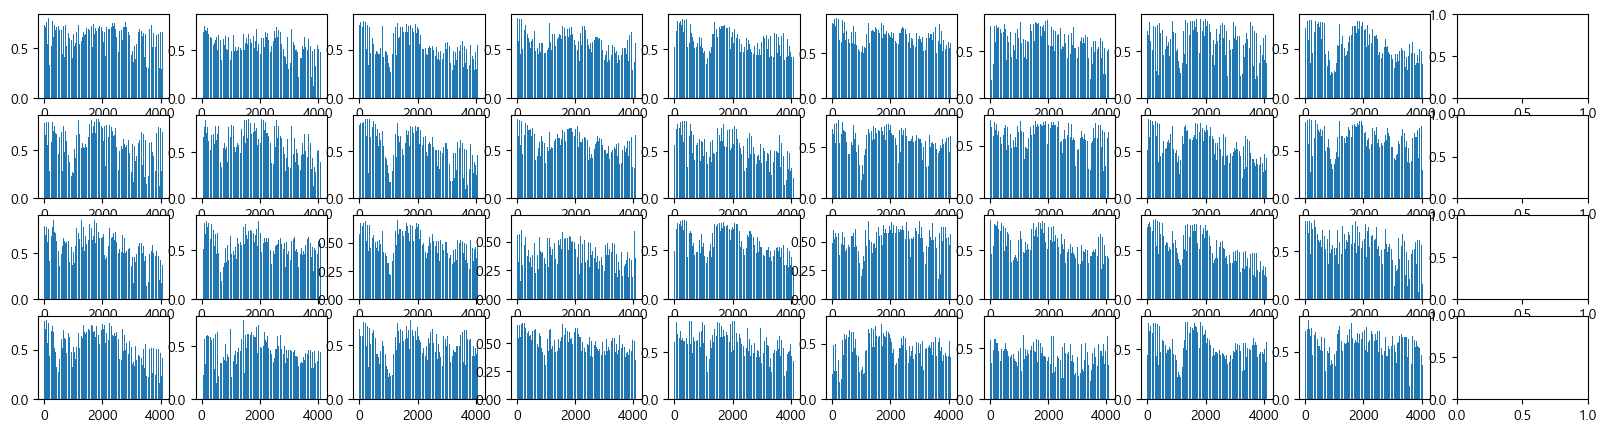

In [ ]:
# 차원 전환후 픽셀 평균 값
fig, axs = plt.subplots(4, 10, figsize=(20, 10))

idx = 0

for i in range(0,4):
    for j in range(0, 10):
        axs[i, j].bar(range(4096) ,one_dimension_means[idx])
        idx += 1


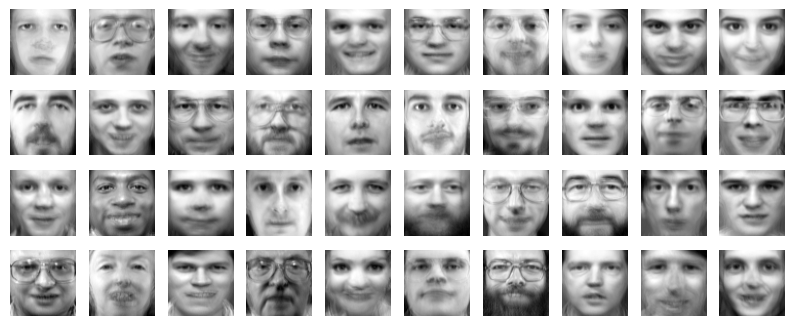

In [ ]:
# 차원 전환 후 픽셀 평균 이미지

one_dimension_pixel_means = list()

for i in people_labels:
    one_dimension_pixel_means.append(one_dimension_means[i].reshape(64, 64))

draw_thumbnail(one_dimension_pixel_means)

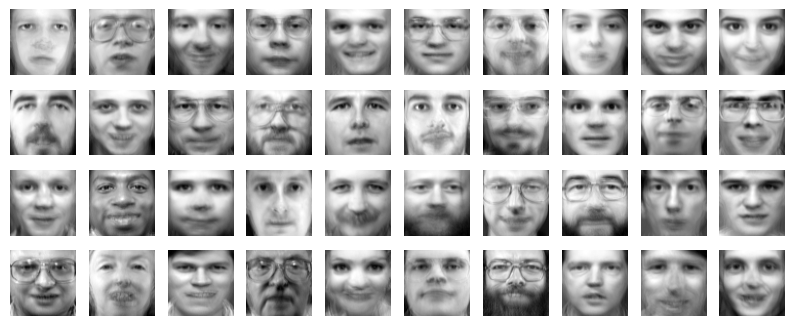

In [39]:
# 차원 전환 하지 않고 픽셀 평균
pixel_means = list()

for i in people_labels:
    pixel_means.append(faces.images[target == i].mean(axis=0))

draw_thumbnail(pixel_means)

# 평균값과 가까운 사진 확인

In [39]:
abs_diff = np.abs(faces.images - one_dimension_pixel_means[0])

In [40]:
abs_mean = np.mean(abs_diff, axis=(1,2))

In [41]:
one_index = np.argsort(abs_mean)[:10]

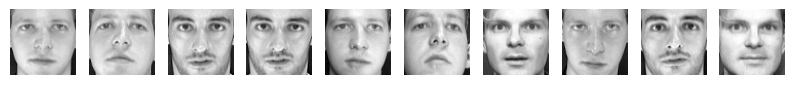

In [50]:
fig, axs = plt.subplots(1, 10, figsize=(10,1))
for i in range(10):
    axs[i].imshow(faces.images[one_index[i]], cmap='gray')
    axs[i].axis('off')

plt.show()

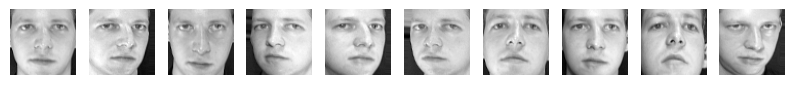

In [51]:
draw_thumbnail(faces.images[target == 0])